In [1]:
import pandas as pd
tesla = pd.read_csv("TSLA.csv")

In [2]:
tesla.shape

(2416, 7)

In [3]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [5]:
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
pd.DataFrame(tesla['Close']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,Close
count,2416.000000
mean,186.403651
std,119.136020
min,15.800000
1%,19.870001
10%,27.120001
30%,87.414997
50%,212.960007
75%,266.774994
90%,333.919998


In [10]:
pd.DataFrame(tesla['High']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,High
count,2416.000000
mean,189.578224
std,120.892329
min,16.629999
1%,20.202001
10%,27.795000
30%,90.474998
50%,216.745002
75%,270.927513
90%,339.854996


In [11]:
pd.DataFrame(tesla['Low']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,Low
count,2416.000000
mean,182.916639
std,116.857591
min,14.980000
1%,19.500000
10%,26.534999
30%,82.100003
50%,208.870002
75%,262.102501
90%,327.324997


In [12]:
pd.DataFrame(tesla['Open']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,Open
count,2416.000000
mean,186.271147
std,118.740163
min,16.139999
1%,19.891499
10%,27.200001
30%,85.590001
50%,213.035004
75%,266.450012
90%,333.455002


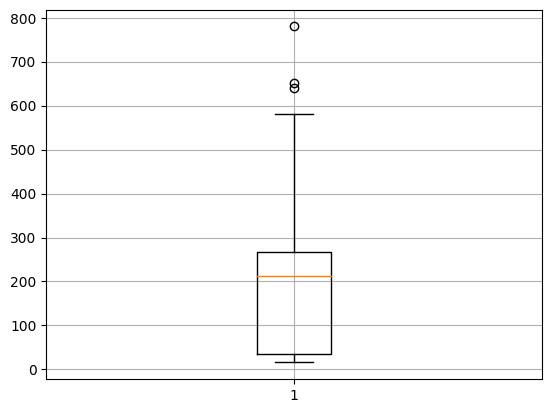

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(tesla['Close'])
plt.grid()
plt.show()

In [15]:
Close_col_df = pd.DataFrame(tesla['Close'])
Close_median = Close_col_df.median()


Q3 = Close_col_df.quantile(q=0.75)
Q1 = Close_col_df.quantile(q=0.25)
IQR = Q3-Q1


IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)


tesla.loc[tesla['Close']>IQR_UL , 'Close'] = int(Close_col_df.quantile(q=0.90))
tesla.loc[tesla['Close']<IQR_LL , 'Close'] = int(Close_col_df.quantile(q=0.01))

In [16]:
High_col_df = pd.DataFrame(tesla['High'])
High_median = High_col_df.median()


Q3 = High_col_df.quantile(q=0.75)
Q1 = High_col_df.quantile(q=0.25)
IQR = Q3-Q1


IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)


tesla.loc[tesla['High']>IQR_UL , 'High'] = int(High_col_df.quantile(q=0.90))
tesla.loc[tesla['High']<IQR_LL , 'High'] = int(High_col_df.quantile(q=0.01))

In [17]:
Low_col_df = pd.DataFrame(tesla['Low'])
Low_median = High_col_df.median()


Q3 = Low_col_df.quantile(q=0.75)
Q1 = Low_col_df.quantile(q=0.25)
IQR = Q3-Q1


IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)


tesla.loc[tesla['Low']>IQR_UL , 'Low'] = int(Low_col_df.quantile(q=0.90))
tesla.loc[tesla['Low']<IQR_LL , 'Low'] = int(Low_col_df.quantile(q=0.01))

In [18]:
Open_col_df = pd.DataFrame(tesla['Open'])
Open_median = High_col_df.median()


Q3 = Open_col_df.quantile(q=0.75)
Q1 = Open_col_df.quantile(q=0.25)
IQR = Q3-Q1


IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)


tesla.loc[tesla['Open']>IQR_UL , 'Open'] = int(Open_col_df.quantile(q=0.90))
tesla.loc[tesla['Open']<IQR_LL , 'Open'] = int(Open_col_df.quantile(q=0.01))

In [20]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,185.879131,189.134093,182.526308,185.959785,186.403651,5.572722e+06
std,117.727539,119.658201,115.842913,117.895176,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,575.690002,594.500000,567.429993,580.989990,780.000000,4.706500e+07


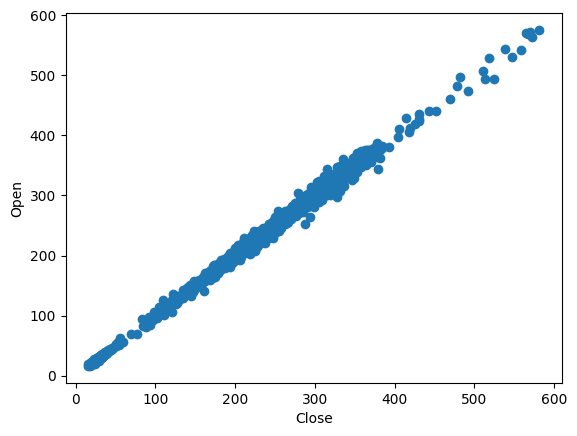

In [21]:
x = tesla["Close"]
y = tesla["Open"]
plt.scatter(x,y)
plt.xlabel('Close')
plt.ylabel('Open')
plt.show()

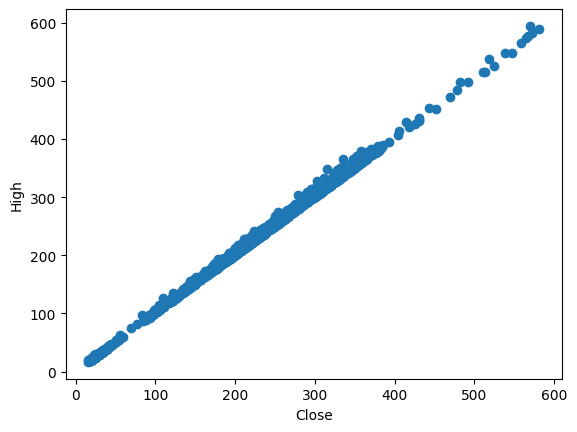

In [22]:
x = tesla["Close"]
y = tesla["High"]
plt.scatter(x,y)
plt.xlabel('Close')
plt.ylabel('High')
plt.show()

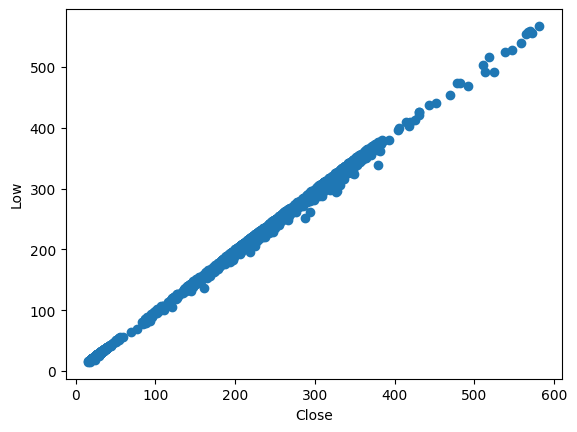

In [26]:
x = tesla['Close']
y = tesla['Low']
plt.scatter(x,y)
plt.xlabel('Close')
plt.ylabel('Low')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1800\554146146.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= tesla.corr().round(2)


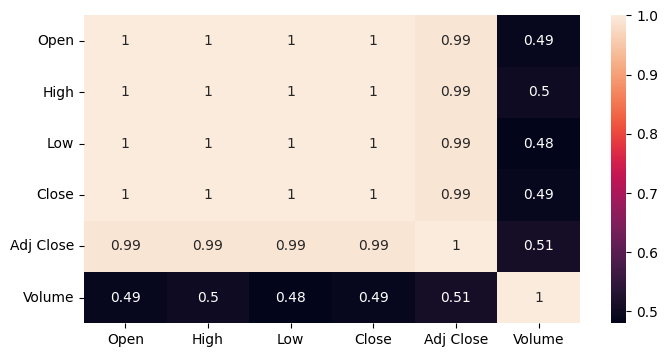

In [28]:
correlation_matrix= tesla.corr().round(2)
fgr, ax = plt.subplots(figsize =(8, 4))
import seaborn as sns
c = sns.heatmap(data=correlation_matrix, annot=True)
fgr.savefig("myimage.png")

In [29]:
tesla.drop(["Date","Adj Close","Volume"],axis=1,inplace=True)
tesla.head()

,Open,High,Low,Close
0,19.000000,25.00,17.540001,23.889999
1,25.790001,30.42,23.299999,23.830000
2,25.000000,25.92,20.270000,21.959999
3,23.000000,23.10,18.709999,19.200001
4,20.000000,20.00,15.830000,16.110001


In [30]:
tesla.describe()

,Open,High,Low,Close
count,2416.000000,2416.000000,2416.000000,2416.000000
mean,185.879131,189.134093,182.526308,185.959785
std,117.727539,119.658201,115.842913,117.895176
min,16.139999,16.629999,14.980000,15.800000
25%,34.342498,34.897501,33.587501,34.400002
50%,213.035004,216.745002,208.870002,212.960007
75%,266.450012,270.927513,262.102501,266.774994
max,575.690002,594.500000,567.429993,580.989990


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data =scaler.fit_transform(tesla)
scaled_data

array([[0.00511125, 0.01448423, 0.00463391, 0.01431377],
       [0.017246  , 0.0238635 , 0.01506018, 0.01420761],
       [0.01583415, 0.01607628, 0.00957553, 0.01089899],
       ...,
       [0.56627647, 0.55785903, 0.5647932 , 0.56122721],
       [0.56627647, 0.55785903, 0.5647932 , 0.56122721],
       [0.56627647, 0.55785903, 0.5647932 , 0.56122721]])

In [33]:
tesla_scaled =pd.DataFrame(scaled_data)
tesla_scaled.columns =tesla.columns
tesla_scaled

,Open,High,Low,Close
0,0.005111,0.014484,0.004634,0.014314
1,0.017246,0.023864,0.015060,0.014208
2,0.015834,0.016076,0.009576,0.010899
3,0.012260,0.011196,0.006752,0.006016
4,0.006898,0.005832,0.001539,0.000548
...,...,...,...,...
2411,0.987132,0.969388,0.983075,0.975070
2412,1.000000,0.991867,1.000000,1.000000
2413,0.566276,0.557859,0.564793,0.561227
2414,0.566276,0.557859,0.564793,0.561227


In [34]:
features = ["Open","High","Low"]
target =["Close"]
X=tesla_scaled[features]
y=tesla_scaled[target]

In [35]:
x.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Close, dtype: float64

In [36]:
y.head()

,Close
0,0.014314
1,0.014208
2,0.010899
3,0.006016
4,0.000548


In [37]:
import sklearn
sklearn.set_config(print_changed_only=False)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
X_train.shape, X_test.shape ,y_train.shape,y_test.shape

((1932, 3), (484, 3), (1932, 1), (484, 1))

In [39]:
model =LinearRegression()
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

In [42]:
accuracy = model.score(X_test,y_test)*100
print(accuracy,'%')

99.9727378794794 %


In [43]:
y_pred = model.predict(X_test)
h=metrics.r2_score(y_pred,y_test)
print(h)

0.9997269511147142


In [44]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.1779989388467416e-05


In [45]:
import math as m
mse = mean_squared_error(y_test, y_pred)
rms = m.sqrt(mse)

print("RMS:", rms)

RMS: 0.003432198914466849


In [46]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.002322373145396635


In [47]:
model.intercept_

array([-0.0002602])

In [48]:
model.coef_

array([[-0.62737767,  0.88656411,  0.7484012 ]])

In [49]:
print("-"*46,"RESULT","-"*46,"\n\n\n") 

import pandas as pd
print('*'*100)
table = [[accuracy],[h],[mse],[rms],[mae]]
df = pd.DataFrame(table, columns = ['Performance Score'], index=['Accuracy ',"r2_score","Mean Squared Error","RMS","Mean Absolute Error"])
print(df)
print('*'*100)

---------------------------------------------- RESULT ---------------------------------------------- 



****************************************************************************************************
                     Performance Score
Accuracy                     99.972738
r2_score                      0.999727
Mean Squared Error            0.000012
RMS                           0.003432
Mean Absolute Error           0.002322
****************************************************************************************************
